In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from game.Bankgames import *
# from game.plotting import plotsave_game_probability_single
from game.distributions import TruncatedGaussian, Uniform, PiecewiseUniform
import nashpy as nh
from tqdm import tqdm

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 17,                   # Set font size to 11pt
    'axes.labelsize': 20,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 18,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})

In [188]:
def plot_game_probability2(game_result, save_dir, figsize=(12, 5), file_prefix=''):
    """
    Plots the probability evolution of actions for Bank 1 and Bank 2 and saves them as separate figures.

    Parameters:
    - game_result (tuple): A single tuple containing (p_b1, p_b2, gammas, taus).
      - p_b1 has shape (#rounds, #actions)
      - p_b2 has shape (#rounds, #actions)
      - gammas and taus define the action pairs
    - save_dir (str): Directory where the plots will be saved.
    - figsize (tuple): Size of the figure.
    """
    # Unpack the game result
    p_b1, p_b2, gammas, taus = game_result
    n = len(gammas)
    assert len(taus) == n, "Number of gammas and taus must be equal"

    T, num_actions = p_b1.shape  # Number of time steps and actions
    assert num_actions == n * n, "Mismatch between number of actions and (tau, gamma) pairs"

    time_steps = np.arange(T)  # Time steps
    color_map = plt.cm.hsv
    colors = [color_map(i / num_actions) for i in range(num_actions)]  # Assign distinct colors

    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Function to plot and save for a given bank
    def plot_and_save(probabilities, title, filename):
        plt.figure(figsize=figsize)
        for action in range(num_actions):
            tau_idx = action // n
            gamma_idx = action % n
            tau = taus[tau_idx]
            gamma = gammas[gamma_idx]

            plt.plot(time_steps, probabilities[:, action], 
                     color=colors[action], 
                     label=f'(τ={tau:.2f}, γ={gamma:.2f})',
                     linewidth=2)
            
        plt.title(f'{title} weights, {file_prefix}')
        plt.xlabel('Round')
        plt.ylabel('Probability')
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True, alpha=0.3)
    # Generate and save plots for Bank 1 and Bank 2 separately
    plot_and_save(p_b1, "Bank 1", f"{file_prefix}Bank1.pdf")
    plot_and_save(p_b2, "Bank 2", f"{file_prefix}Bank2.pdf")

In [3]:
import os
def plotsave_game_probability(game_result, save_dir, figsize=(12, 5), file_prefix=''):
    """
    Plots the probability evolution of actions for Bank 1 and Bank 2 and saves them as separate figures.

    Parameters:
    - game_result (tuple): A single tuple containing (p_b1, p_b2, gammas, taus).
      - p_b1 has shape (#rounds, #actions)
      - p_b2 has shape (#rounds, #actions)
      - gammas and taus define the action pairs
    - save_dir (str): Directory where the plots will be saved.
    - figsize (tuple): Size of the figure.
    """
    # Unpack the game result
    p_b1, p_b2, gammas, taus = game_result
    n = len(gammas)
    assert len(taus) == n, "Number of gammas and taus must be equal"

    T, num_actions = p_b1.shape  # Number of time steps and actions
    assert num_actions == n * n, "Mismatch between number of actions and (tau, gamma) pairs"

    time_steps = np.arange(T)  # Time steps
    color_map = plt.cm.hsv
    colors = [color_map(i / num_actions) for i in range(num_actions)]  # Assign distinct colors

    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Function to plot and save for a given bank
    def plot_and_save(probabilities, title, filename):
        plt.figure(figsize=figsize)
        for action in range(num_actions):
            tau_idx = action // n
            gamma_idx = action % n
            tau = taus[tau_idx]
            gamma = gammas[gamma_idx]

            plt.plot(time_steps, probabilities[:, action], 
                     color=colors[action], 
                     label=f'(τ={tau:.2f}, γ={gamma:.2f})',
                     linewidth=2)
            
        plt.title(f'{title} weights, {file_prefix}')
        plt.xlabel('Round')
        plt.ylabel('Probability')
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Save the figure
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()

    # Generate and save plots for Bank 1 and Bank 2 separately
    plot_and_save(p_b1, "Bank 1", f"{file_prefix}Bank1.pdf")
    plot_and_save(p_b2, "Bank 2", f"{file_prefix}Bank2.pdf")

# PLOTS TODO n = 4 actions BELOW

1) Known Matrix, Full matrix known


Game with n = 4 actions (2 gammas) 
4 cases for epsilon_1, epsilon_2

Dynamics curves, show indifferent to initialization 

- epsilon_1>0, epsilon_2>0 ; 1 pure NE
- epsilon_1<0, epsilon_2<0 1 pure NE
- 3 cases for different signs (-,+)
- 3 cases for different signs (+, -)

---

1) Sampled Matrix (Fresh matrix estimated in each round) 

Game with n = 4 actions (2 gammas)
4 cases for epsilon_1, epsilon_2

Dynamics curves, show indifferent to initialization 

- 1 pure NE
- 1 pure NE
- 3 cases for different signs (-,+)
- 3 cases for different signs (+,-)
 
Fraction of convergence plots
- Fix distribution, fix gamma (defines an instance of the one-shot game)
- For a fixed initilaization, check convergence across randomness in sampling (fresh estimate for A)
- Fix distribution, fix gamma, for some fixed initilaization, check distance to NE across randomness in sampling (fresh estimate for A)


- For a fixed initilaization, check convergence check convergence across randomness in sampling (moving estimate for A)
- Fix distribution, fix gamma, for some fixed initilaization, check distance to NE across randomness in sampling (moving estimate for A)

# PLOTS TODO for larger number of actions

vary distribution (fix truncated gaussian some values)
precified values of gamma
vary initializations

In [4]:
T = 10000
eta = 0.1
p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

## Case ++ : epsilon_1 > 0, epsilon_2 > 0, 
## Using truncgauss here

1 pure NE tau_l gamma_h acc to theory, the hedge also converges to it across all 3 matrices

In [65]:
# Case ++
gammas = sorted([0.4, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.3
sigma = 0.1
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1 and epsilon2

0.010332909480748565 0.005169944765989978


In [66]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

1

[[[0, 1, 0, 0], [0, 1, 0, 0]]]

1

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.]))]

In [67]:
save_dir = '../plots/2gamma-dynamics/case++'

In [68]:
# p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
# p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

p_b1 = np.array([0.1, 0.5, 0.3, 0.1])
p_b2 = np.array([0.1, 0.3, 0.5, 0.1])

In [69]:
# known matrix
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[4.28244008e-26 9.99999981e-01 5.67743761e-12 1.85963498e-08] [5.92962413e-26 9.99999957e-01 1.31307198e-11 4.30801111e-08]


In [70]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')
# plotsave_game_probability2((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')

In [71]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 

[9.62995033e-26 9.99999975e-01 1.46505741e-11 2.47188307e-08] [1.31810721e-25 9.99999943e-01 3.34732782e-11 5.72844385e-08]


In [72]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Fresh-Estimate')
# plotsave_game_probability2((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')

In [73]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[2.35872558e-26 9.99999985e-01 5.58465565e-12 1.52800480e-08] [3.24805550e-26 9.99999965e-01 1.28423938e-11 3.50858337e-08]


In [74]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Moving-Estimate')
# plotsave_game_probability2((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')

## Case --
1 pure NE tau_h, gamma_l

In [76]:
# p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
# p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

p_b1 = np.array([0.1, 0.5, 0.3, 0.1])
p_b2 = np.array([0.1, 0.3, 0.5, 0.1])

In [77]:
gammas = sorted([0.4, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.1
sigma = 0.3
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1<0 and epsilon2<0

-0.011946914670527095 -0.03468944104610684


In [78]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

1

[[[0, 0, 1, 0], [0, 0, 1, 0]]]

1

[(array([0., 0., 1., 0.]), array([0., 0., 1., 0.]))]

In [79]:
save_dir = '../plots/2gamma-dynamics/case--'

In [80]:
# known matrix
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[1.55478040e-07 4.63821239e-38 9.99999845e-01 1.24616764e-45] [9.72597673e-08 2.00924702e-38 9.99999903e-01 1.02420667e-45]


In [81]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')

In [82]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[8.42053935e-08 3.06959560e-38 9.99999916e-01 5.24177390e-46] [5.27947744e-08 1.34233831e-38 9.99999947e-01 4.38818102e-46]


In [83]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Fresh-Estimate')

In [84]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[1.85745055e-07 5.55041364e-39 9.99999814e-01 2.54219989e-46] [1.16302122e-07 2.45635459e-39 9.99999884e-01 2.12238621e-46]


In [85]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Moving-Estimate')

## Case +-

In [86]:
T = 25000
gammas = sorted([0.4, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.1
sigma = 0.2
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1 and epsilon2

0.0022268793930812734 -0.0036150576433734713


In [87]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

3

[[[0, 0, 1, 0], [0, 0, 1, 0]],
 [[0, 1, 0, 0], [0, 1, 0, 0]],
 [[0, 0.6188114696914494, 0.3811885303085506, 0],
  [0, 0.6188114696914494, 0.3811885303085506, 0]]]

3

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.])),
 (array([0., 0., 1., 0.]), array([0., 0., 1., 0.])),
 (array([0.        , 0.61881147, 0.38118853, 0.        ]),
  array([0.        , 0.61881147, 0.38118853, 0.        ]))]

In [88]:
save_dir = '../plots/2gamma-dynamics/case+-'

In [96]:
p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

# p_b1 = np.array([0.1, 0.5, 0.3, 0.1])
# p_b2 = np.array([0.1, 0.3, 0.5, 0.1])

In [97]:
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[9.51602307e-06 8.04533942e-04 9.99185934e-01 1.64899809e-08] [9.51602307e-06 8.04533942e-04 9.99185934e-01 1.64899809e-08]


In [98]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')

In [99]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[7.38377762e-06 8.09517250e-04 9.99183079e-01 2.03430957e-08] [7.38377762e-06 8.09517250e-04 9.99183079e-01 2.03430957e-08]


In [100]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Fresh-Estimate')

In [101]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[1.02876048e-05 1.30545691e-03 9.98684209e-01 4.63214052e-08] [1.02876048e-05 1.30545691e-03 9.98684209e-01 4.63214052e-08]


In [102]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Moving-Estimate')

## Case  -+

In [108]:
T

25000

In [109]:
gammas = gammas = sorted([0.6, 0.7])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)

gtm.eps1,gtm.eps2

(-0.005480769254716564, 0.002269230769230711)

In [110]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

3

[[[0, 1, 0, 0], [0, 0, 1, 0]],
 [[0, 0, 1, 0], [0, 1, 0, 0]],
 [[0, 0.2928039702233183, 0.7071960297766817, 0],
  [0, 0.2928039702233183, 0.7071960297766817, 0]]]

3

[(array([0., 1., 0., 0.]), array([0., 0., 1., 0.])),
 (array([0., 0., 1., 0.]), array([0., 1., 0., 0.])),
 (array([0.        , 0.29280397, 0.70719603, 0.        ]),
  array([0.        , 0.29280397, 0.70719603, 0.        ]))]

In [156]:
T = 50000
p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

# p_b1 = np.array([0.1, 0.5, 0.3, 0.1])
# p_b2 = np.array([0.1, 0.3, 0.5, 0.1])

In [148]:
# p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
# p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

In [157]:
save_dir = '../plots/2gamma-dynamics/case-+'

In [158]:
# run hedge on known matrix
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[5.43117797e-39 2.92841965e-01 7.07158035e-01 1.09580971e-34] [5.43117797e-39 2.92841965e-01 7.07158035e-01 1.09580971e-34]


In [159]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')

In [160]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=puf, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 

[3.92648214e-39 3.18482530e-01 6.81517470e-01 2.29815731e-34] [3.92648214e-39 3.18482530e-01 6.81517470e-01 2.29815731e-34]


In [161]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Fresh-Estimate')

In [162]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=puf, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[7.17028467e-39 2.93465896e-01 7.06534104e-01 6.89442622e-33] [7.17028467e-39 2.93465896e-01 7.06534104e-01 6.89442622e-33]


In [163]:
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Moving-Estimate')

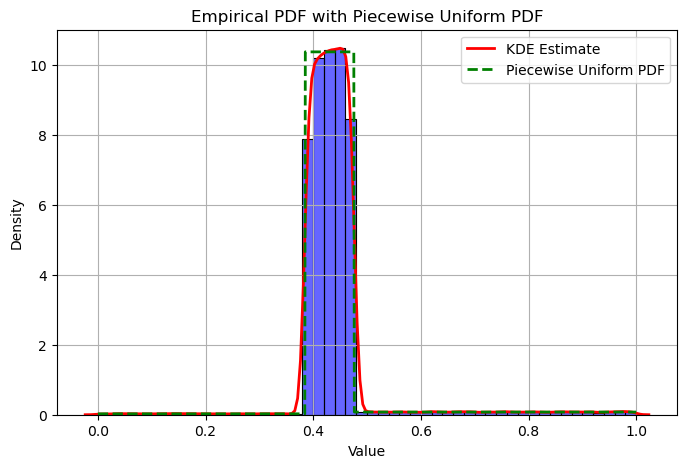

In [248]:
# @all ignore this block it was to check the sampling correctness with the actual probability, which is now fixed

def plot_empirical_pdf(samples, piecewise_uniform_pdf, tau_l, tau_h, bins=50, density=True):
    plt.figure(figsize=(8, 5))
    sns.histplot(samples, bins=bins, kde=False, stat="density", alpha=0.6, color='b', edgecolor='black')
    sns.kdeplot(samples, color='r', linewidth=2, label='KDE Estimate')
    
    # Plot piecewise uniform PDF
    
    y_values = np.linspace(0, 1, 1000)
    pdf_values = [piecewise_uniform_pdf(y, tau_l, tau_h) for y in y_values]
    plt.plot(y_values, pdf_values, color='g', linestyle='--', linewidth=2, label='Piecewise Uniform PDF') # true
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Empirical PDF with Piecewise Uniform PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define piecewise uniform PDF function
def piecewise_uniform_pdf(y, tau_l, tau_h):
    if 0 <= y < tau_l:
        return 0.01 / tau_l
    elif tau_l <= y < tau_h:
        return 0.95 / (tau_h - tau_l)
    elif tau_h <= y <= 1:
        return 0.04 / (1 - tau_h)
    else:
        return 0

gammas = sorted([0.1, 0.6])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)

tau_l, tau_h = taus
samples = puf.get_samples(100000)

      
# Assuming arr contains the samples
plot_empirical_pdf(samples, piecewise_uniform_pdf, tau_l, tau_h)

# Exploring the +- case more for initialization dependence 

In [402]:
# mu, sigma = 0.4, 0.1
# mu, sigma = 0.2, 0.2
mu, sigma = 0.1, 0.2 # 3 diff
gamma_l, gamma_h = 0.4, 0.8
gammas = [gamma_l, gamma_h]
taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])

In [403]:
tg = TruncatedGaussian(mu=mu, sigma=sigma)
gtm = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=tg)

In [404]:
gtm.NE_se

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.])),
 (array([0., 0., 1., 0.]), array([0., 0., 1., 0.])),
 (array([0.        , 0.61881147, 0.38118853, 0.        ]),
  array([0.        , 0.61881147, 0.38118853, 0.        ]))]

In [405]:
gtm.eps_case

'+-'

In [406]:
save_dir = '../plots/2gamma-dynamics/case+-'

In [413]:
# init close to the NE which has all weight on action 3 (tau_h, gamma_l)
# p_a = np.array([0., 0.1, 0.9, 0.])
# p_b = np.array([0., 0.1, 0.9, 0.])

# init close to the NE which has all weight on action 2 (tau_l, gamma_h) 
# p_a = np.array([0, 0.9, 0.1, 0.])
# p_b = np.array([0, 0.9, 0.1, 0.])


# init exactly at mixed NE stays there
# p_a = np.array([0.        , 0.61881147, 0.38118853, 0.        ]) # [0,c,1-,c, 0]
# p_b = np.array([0.        , 0.61881147, 0.38118853, 0.        ])

# init slightly away deviated to pure NE
p_a = np.array([0.        , 0.61, 0.39, 0.        ])
p_b = np.array([0.        , 0.61, 0.39, 0.        ])

In [414]:
T = 20000
# run hedge on known matrix
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_a, p_b2=p_b, eta=eta)
print(b1[-1], b2[-1])
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Known-Matrix')

gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)
b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_a, p_b2=p_b, eta=eta)
print(b1[-1], b2[-1])
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Fresh-Estimate')

gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)
b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_a, p_b2=p_b, eta=eta)
print(b1[-1], b2[-1]) 
plotsave_game_probability((b1,b2,gammas,taus), save_dir, file_prefix='Moving-Estimate')

[0.         0.46688303 0.53311697 0.        ] [0.         0.46688303 0.53311697 0.        ]
[0.         0.95458629 0.04541371 0.        ] [0.         0.95458629 0.04541371 0.        ]
[0.         0.97422227 0.02577773 0.        ] [0.         0.97422227 0.02577773 0.        ]


[0.00000000e+00 2.11259414e-11 1.00000000e+00 0.00000000e+00] [0.00000000e+00 2.11259414e-11 1.00000000e+00 0.00000000e+00]


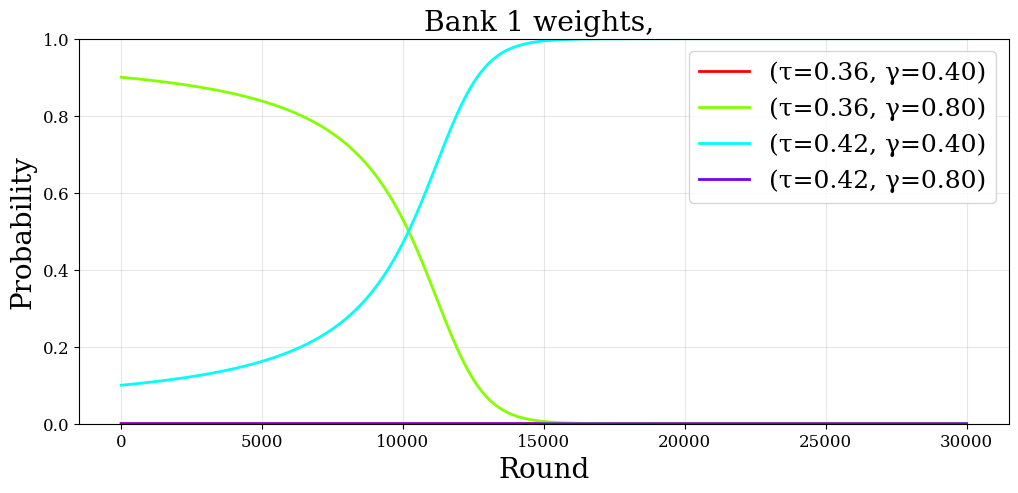

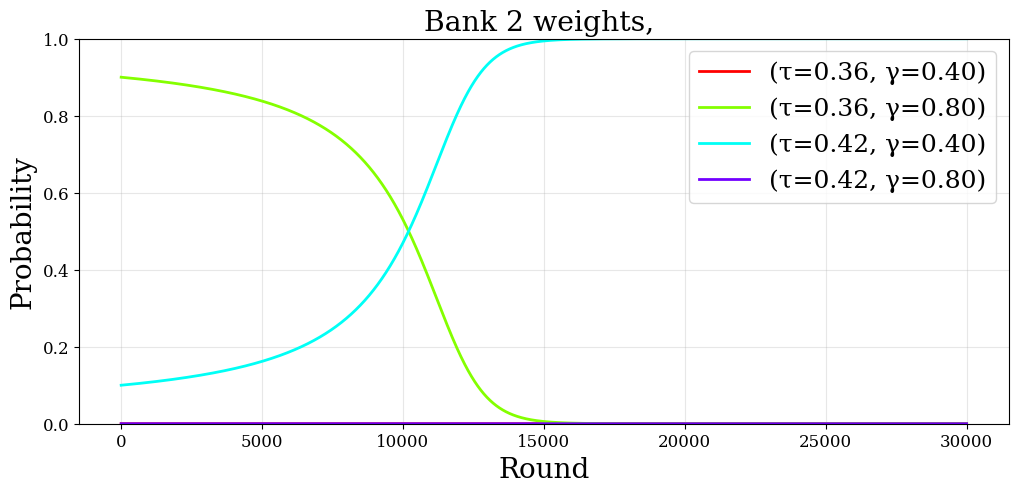

In [353]:
# init close to the NE which has all weight on action 2 (tau_l, gamma_h) 

p_a = np.array([0., 0.9, 0.1, 0.])
p_b = np.array([0., 0.9, 0.1, 0.])

b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_a, p_b2=p_b, eta=eta)
print(b1[-1], b2[-1])
plot_game_probability2((b1,b2,gammas,taus), save_dir, figsize=(12, 5), file_prefix='')

[0.00000000e+00 1.65039697e-18 1.00000000e+00 0.00000000e+00] [0.00000000e+00 1.65039697e-18 1.00000000e+00 0.00000000e+00]


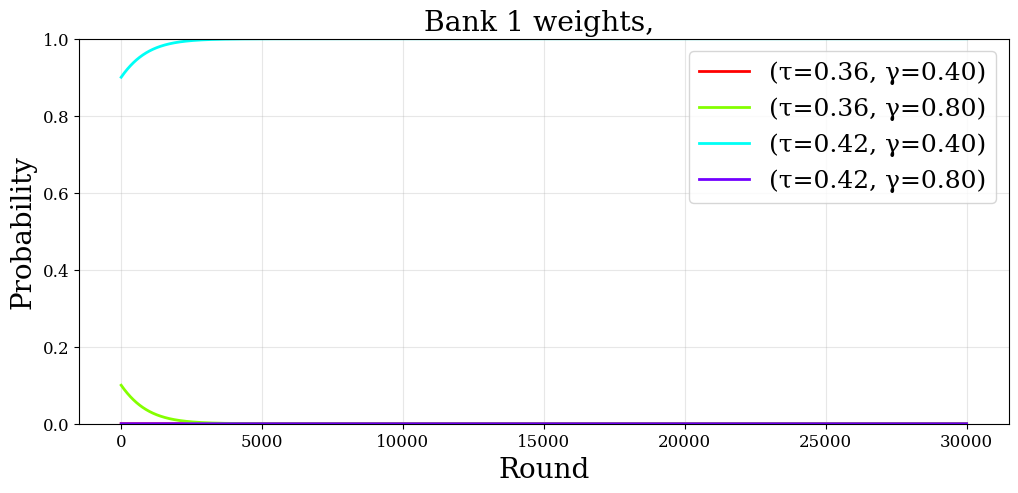

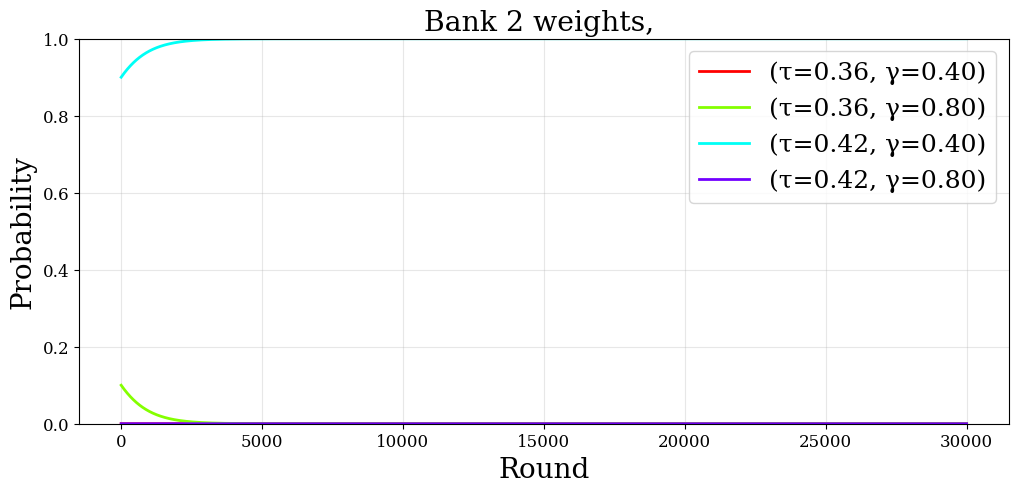

In [349]:
# init close to the NE which has all weight on action 3 (tau_h, gamma_l)
p_a = np.array([0, 0.1, 0.9, 0.])
p_b = np.array([0, 0.1, 0.9, 0.])
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_a, p_b2=p_b, eta=eta)
print(b1[-1], b2[-1])
plot_game_probability2((b1,b2,gammas,taus), save_dir, figsize=(12, 5), file_prefix='')

In [350]:
gtm.NE_se

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.])),
 (array([0., 0., 1., 0.]), array([0., 0., 1., 0.])),
 (array([0.       , 0.9566646, 0.0433354, 0.       ]),
  array([0.       , 0.9566646, 0.0433354, 0.       ]))]

[0.        0.9566646 0.0433354 0.       ] [0.        0.9566646 0.0433354 0.       ]


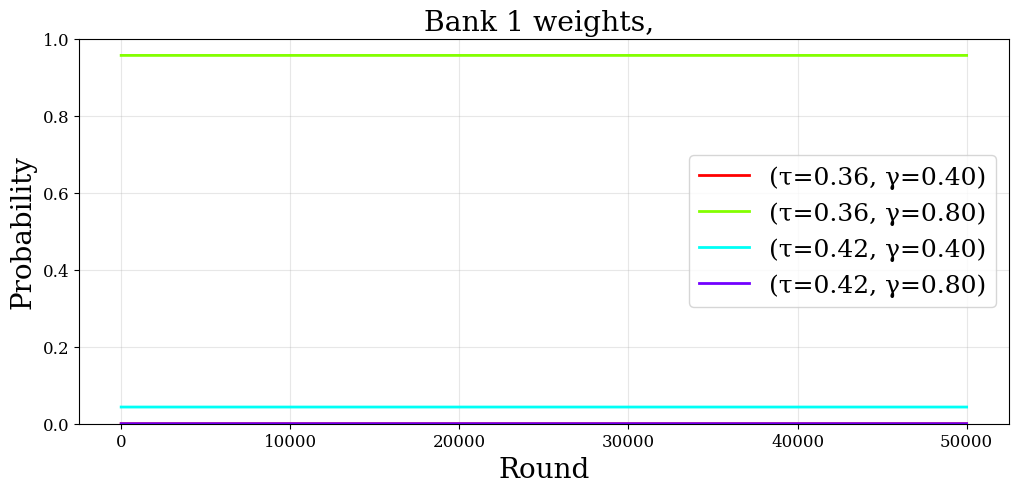

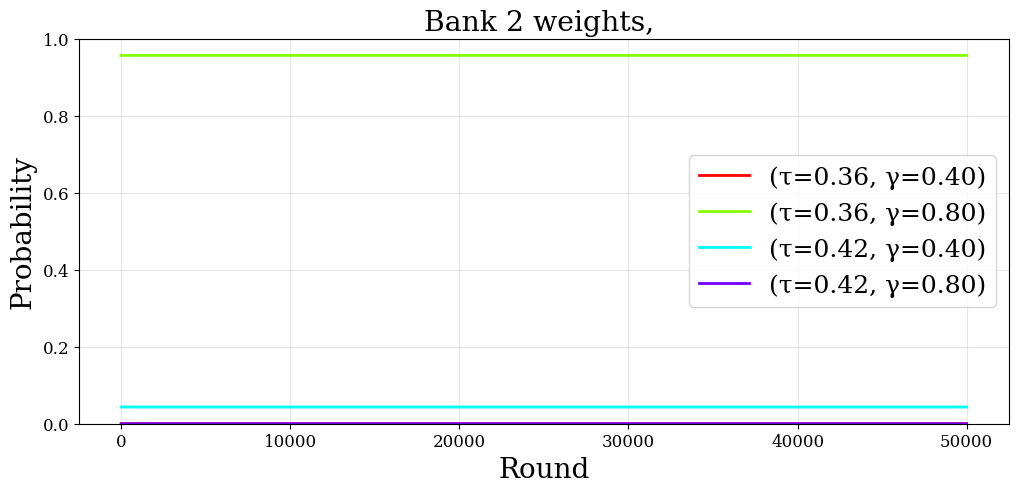

In [354]:
p_a,p_b = gtm.NE_se[2]


b1,b2,gammas,taus = gtm.run_hedge(T=50000, p_b1=p_a, p_b2=p_b, eta=eta)
print(b1[-1], b2[-1])
plot_game_probability2((b1,b2,gammas,taus), save_dir, figsize=(12, 5), file_prefix='')

[0.00000000e+00 2.82930236e-11 1.00000000e+00 0.00000000e+00] [0.00000000e+00 2.82930236e-11 1.00000000e+00 0.00000000e+00]


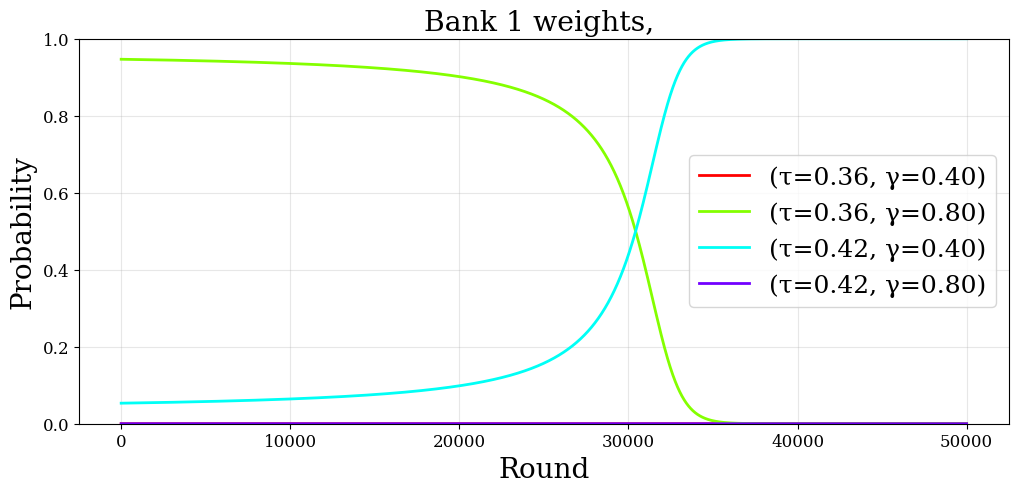

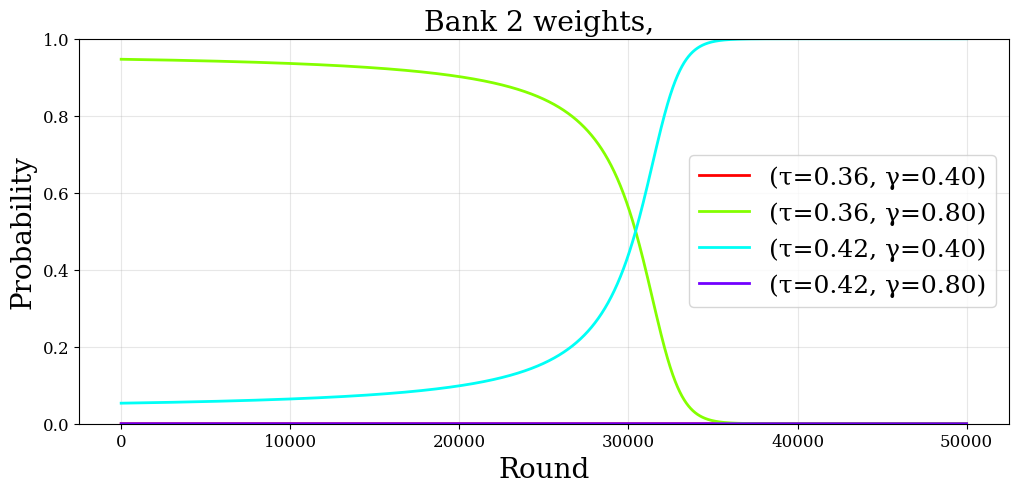

In [355]:
# unstable NE?
p_a, p_b = gtm.NE_se[2][0] + [0, -0.01, 0.01, 0] ,  gtm.NE_se[2][0] + [0, -0.01, 0.01, 0]


b1,b2,gammas,taus = gtm.run_hedge(T=50000, p_b1=p_a, p_b2=p_b, eta=eta)
print(b1[-1], b2[-1])
plot_game_probability2((b1,b2,gammas,taus), save_dir, figsize=(12, 5), file_prefix='')